In [4]:
import sys
path = '/home/slepes/projects/sph-files'
sys.path.insert(0, path)
#from classes import SnapViewer, SnapEvolution
import classes as cl

import matplotlib.pyplot as plt
import numpy as np

from importlib import reload

reload(cl)

<module 'classes' from '/home/slepes/projects/sph-files/classes.py'>

In [5]:
ft = cl.Functions()
ft.flags['flag_speciesKrome'] = False
ft.flags['flag_outputpotential'] = True
ft.flags

path = '/home/esillero/sphviewer-sims/snaps/mergerA/snap_'
q = 306
data = cl.SnapEvolution(path, q, flags=ft.flags)

error while adding 1 files
305 files added


In [3]:
data.get_keys()

Header: ['npart', 'massarr', 'time', 'redshift', 'flag_sfr', 'flag_feedback', 'npartTotal', 'flag_cooling', 'num_files', 'BoxSize', 'Omega0', 'OmegaLambda', 'HubbleParam', 'flag_stellarage', 'flag_metals', 'npartTotalHighWord', 'flag_entropy_instead_u', 'flag_doubleprecision', 'flag_ic_info', 'lpt_scalingfactor', 'fill', 'names']

Part Type 0 : ['InternalEnergy', 'Density', 'ne1', 'nh', 'SmoothingLength', 'StarFormationRate', 'ElementAbundance', 'ArtViscosityCoef', 'ArtConductivityCoef', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass', 'PotencialEnergy']

Part Type 1 : ['ID', 'Coordinates', 'Velocity', 'Mass', 'PotencialEnergy']

Part Type 2 : ['ID', 'Coordinates', 'Velocity', 'Mass', 'PotencialEnergy']

Part Type 3 : ['ID', 'Coordinates', 'Velocity', 'Mass', 'PotencialEnergy']

Part Type 4 : ['StellarFormationTime', 'ElementAbundance', 'EnergySN', 'EnergySNCold', 'ID', 'Coordinates', 'Velocity', 'Mass', 'PotencialEnergy']


In [9]:
snap = data.snaps[0]
gas = snap.pos[0]
n1 = gas[0]
len(gas)

99999

In [7]:
snap.part[0]['nh'][0]

0.99865186

In [8]:
snap.header["npart"]

array([ 99999, 200000,  60000,  30000,    423,      0], dtype=int32)

In [10]:
snap.header["npartTotal"]

array([ 99999, 200000,  60000,  30000,    423,      0], dtype=uint32)

<IPython.core.display.Javascript object>


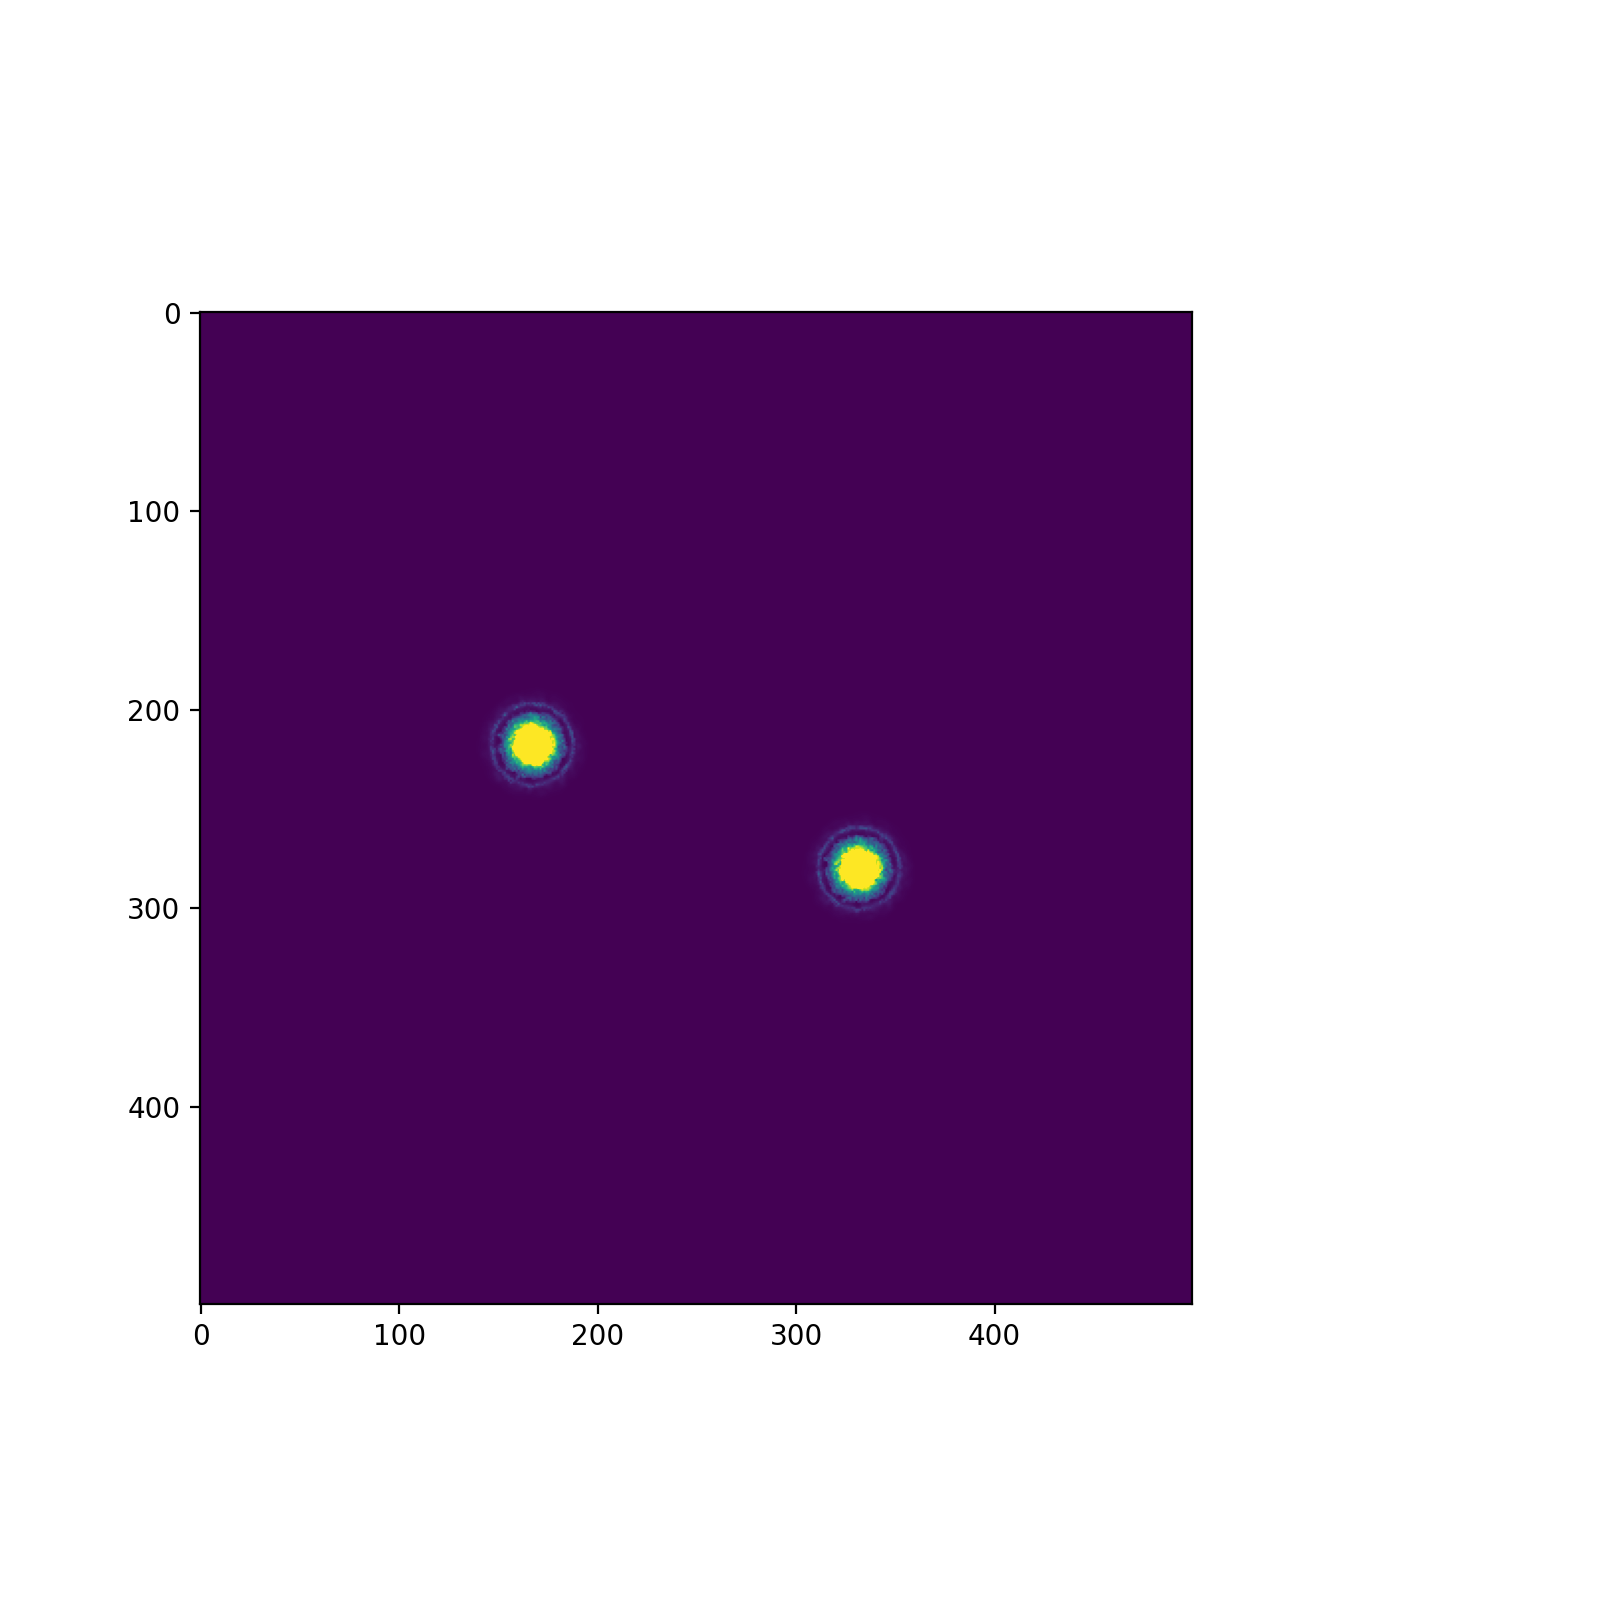

/home/slepes/jupy/lib64/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


In [24]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1, 1)

for i in range(10):
    ax = plt.subplot(gs[0, 0])
    snap = data.snaps[i]
    qv = snap.quickview(pos=snap.pos[0], mass=snap.mass[0])
    img = qv.get_image()
    vmin, vmax=snap.get_v(img, 1,0.1)
    
    graf1 = ax.imshow(img, vmax=vmax)
    cbar = plt.colorbar(graf1, ax=ax)
    plt.savefig(f'plot{i}.png',dpi=100)
    cbar.remove()
plt.show()

In [18]:
images1 = []
images2 = []
images3 = []

extent=[-100,100,-100,100]
for snap in data.snaps:
    img1 = snap.quickview(pos=snap.pos[0], mass=snap.mass[0], r='infinity', 
                          extent=extent, plot=False).get_image()
    img2 = snap.quickview(pos=snap.pos[4], mass=snap.mass[4], r='infinity', 
                          extent=extent, plot=False).get_image()
    img3 = snap.quickview(pos=snap.pos[2], mass=snap.mass[2], r='infinity', 
                          extent=extent, plot=False).get_image()
    
    images1.append(img1)
    images2.append(img2)
    images3.append(img3)

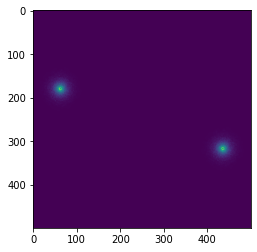

In [20]:
plt.figure()
plt.imshow(images1[0])
plt.show()

In [21]:

fig = plt.figure(figsize=(7,7))

for i in range(len(images1)):
    
    ax1 = fig.add_axes([1, 1, 0.45, 0.3])
    ax2 = fig.add_axes([1, 1.4, 1, 0.67])
    ax3 = fig.add_axes([1.55, 1, 0.45, 0.3])

    graf1 = ax1.imshow(images2[i], vmax=vmax*0.01, aspect='auto', extent=extent)
    graf2 = ax2.imshow(images1[i], vmax=vmax*0.01, aspect='auto',extent=extent)
    graf3 = ax3.imshow(images3[i], vmax=vmax*0.01, aspect='auto',extent=extent)

    cbar1 = plt.colorbar(graf1, ax=ax1)
    cbar2 = plt.colorbar(graf2, ax=ax2)
    cbar3 = plt.colorbar(graf3, ax=ax3)

    fig.savefig(f'tripple_video/tripe_test{"%03d"%i}.jpg', dpi=100, bbox_inches='tight')
    cbar1.remove()
    cbar2.remove()
    cbar3.remove()
    
    ax1.remove()
    ax2.remove()
    ax3.remove()
    
plt.show()

<Figure size 504x504 with 0 Axes>

vmax

In [26]:
path1 = 'tripple_video/'
path2 = 'tripple_test'

ft.save_gif(path1, path2)